DECOMPOSIÇÃO DE SÉRIES TEMPORAIS

In [1]:
# Decomposição de séries temporais
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
# registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

<function pandas.plotting._misc.register() -> 'None'>

In [5]:
# Carregamento da base de dados, conversão do atributo para data e criação de série temporal (ts)
base = pd.read_csv('AirPassengers.csv')
dataparse = lambda x: datetime.strptime(x, '%Y-%m')
base = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], index_col='Month', date_parser = dataparse)
ts = base['#Passengers']

<ipython-input-5-f6a926f7cabf>:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  base = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], index_col='Month', date_parser = dataparse)


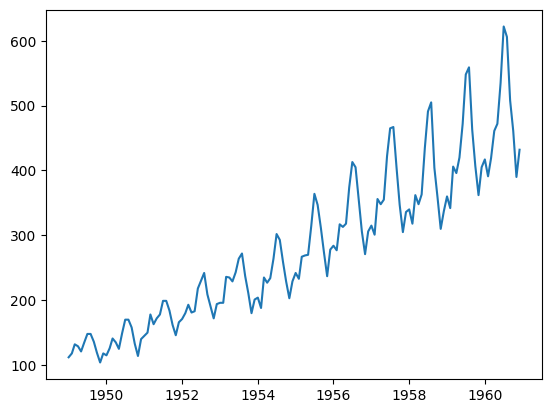

In [6]:
# Visualização da série temporal
plt.plot(ts)

In [12]:
# Decomposição da série temporal, criando uma variável para cada formato
decomposicao = seasonal_decompose(ts)

In [13]:
# Tendência
tendencia = decomposicao.trend
tendencia

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [15]:
# Sazionalidade
sazonalidade = decomposicao.seasonal
sazonalidade

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

In [16]:
# erro
aleatorio = decomposicao.resid
aleatorio

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

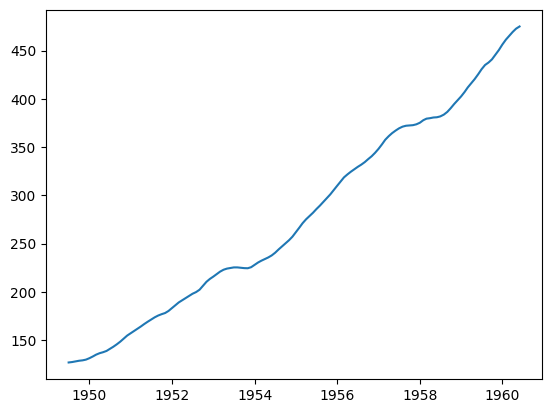

In [17]:
# Visualização do gráfico para cada formato de série temporal
plt.plot(tendencia)

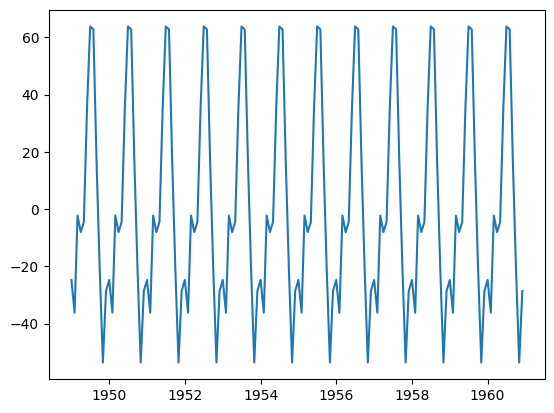

In [18]:
plt.plot(sazonalidade)

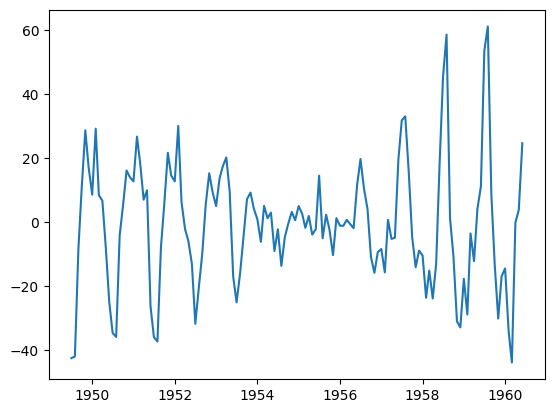

In [19]:
plt.plot(aleatorio)

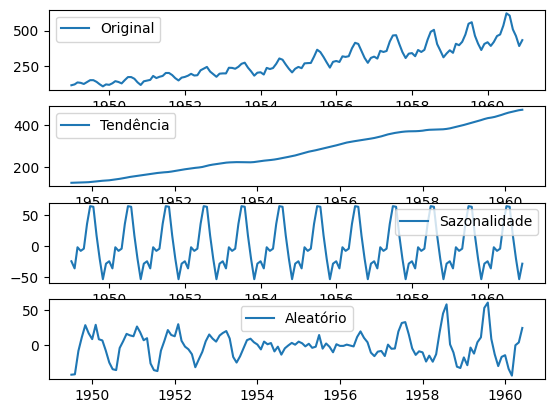

In [20]:
plt.subplot(4,1,1)
plt.plot(ts, label = 'Original')
plt.legend(loc='best')

# Visualização somente da tendência
plt.subplot(4,1,2)
plt.plot(tendencia, label = 'Tendência')
plt.legend(loc='best')

# Visualização somente da sazonalidade
plt.subplot(4,1,3)
plt.plot(sazonalidade, label = 'Sazonalidade')
plt.legend(loc='best')

# Visualização somente do elemento aleatório
plt.subplot(4,1,4)
plt.plot(aleatorio, label = 'Aleatório')
plt.legend(loc='best')